# Association Analysis
## Frequent Itemset Mining using Apriori Algorithm

### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Reading Data

In [2]:
df = pd.read_csv('./Online_Retail_CSV.csv', sep=',')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

### Data Preprocessing

In [6]:
#remove additional spaces
df['Description'] = df['Description'].str.strip()
#remove NA values
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
#remove cancelled orders
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [7]:
len(df['Description'].unique())

4196

In [68]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    basket = (df[df['Country'] == country_filter].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
    return basket

### Creating filter on country to select the specific data

In [90]:
country_filter = "France"
basket_french = create_basket("France")
basket_french.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One hot encoded data

In [92]:
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying Apriori

In [77]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [88]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.022959,0.045918,0.020408,0.888889,19.358025,0.019354,8.586735
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.028061,0.102041,0.022959,0.818182,8.018182,0.020096,4.938776
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.028061,0.094388,0.022959,0.818182,8.668305,0.020311,4.980867
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.030612,0.096939,0.025510,0.833333,8.596491,0.022543,5.418367
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
6,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.030612,0.094388,0.025510,0.833333,8.828829,0.022621,5.433673
7,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.043367,0.094388,0.035714,0.823529,8.724960,0.031621,5.131803
8,(CARD DOLLY GIRL),(SPACEBOY BIRTHDAY CARD),0.030612,0.071429,0.028061,0.916667,12.833333,0.025875,11.142857
9,(CHILDRENS CUTLERY CIRCUS PARADE),(CHILDRENS CUTLERY DOLLY GIRL),0.030612,0.071429,0.025510,0.833333,11.666667,0.023324,5.571429


### Changing min_support and min_confidence

In [79]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.068878,(ASSORTED COLOUR MINI CASES)
5,0.081633,(BAKING SET 9 PIECE RETROSPOT)
6,0.051020,(BLUE HARMONICA IN BOX)
7,0.068878,(CHARLOTTE BAG APPLES DESIGN)
8,0.066327,(CHARLOTTE BAG DOLLY GIRL DESIGN)
9,0.058673,(CHARLOTTE BAG PINK POLKADOT)


In [87]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.80)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.022959,0.045918,0.020408,0.888889,19.358025,0.019354,8.586735
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.028061,0.102041,0.022959,0.818182,8.018182,0.020096,4.938776
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.028061,0.094388,0.022959,0.818182,8.668305,0.020311,4.980867
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.030612,0.096939,0.025510,0.833333,8.596491,0.022543,5.418367
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
6,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.030612,0.094388,0.025510,0.833333,8.828829,0.022621,5.433673
7,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.043367,0.094388,0.035714,0.823529,8.724960,0.031621,5.131803
8,(CARD DOLLY GIRL),(SPACEBOY BIRTHDAY CARD),0.030612,0.071429,0.028061,0.916667,12.833333,0.025875,11.142857
9,(CHILDRENS CUTLERY CIRCUS PARADE),(CHILDRENS CUTLERY DOLLY GIRL),0.030612,0.071429,0.025510,0.833333,11.666667,0.023324,5.571429


### Changing min_support and min_confidence

In [81]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.030612,(10 COLOUR SPACEBOY PEN)
1,0.022959,(12 PENCILS TALL TUBE RED RETROSPOT)
2,0.035714,(3 PIECE SPACEBOY COOKIE CUTTER SET)
3,0.045918,(36 PENCILS TUBE RED RETROSPOT)
4,0.022959,(36 PENCILS TUBE WOODLAND)
5,0.071429,(4 TRADITIONAL SPINNING TOPS)
6,0.025510,(6 GIFT TAGS VINTAGE CHRISTMAS)
7,0.022959,(60 CAKE CASES DOLLY GIRL DESIGN)
8,0.020408,(60 TEATIME FAIRY CAKE CASES)
9,0.028061,(ALARM CLOCK BAKELIKE CHOCOLATE)


In [82]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.85)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.022959,0.045918,0.020408,0.888889,19.358025,0.019354,8.586735
1,(CARD DOLLY GIRL),(SPACEBOY BIRTHDAY CARD),0.030612,0.071429,0.028061,0.916667,12.833333,0.025875,11.142857
2,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
3,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476
4,(CHILDS BREAKFAST SET DOLLY GIRL),(CHILDS BREAKFAST SET SPACEBOY),0.033163,0.043367,0.030612,0.923077,21.285068,0.029174,12.436224
5,(DOLLY GIRL BABY GIFT SET),(SPACEBOY BABY GIFT SET),0.022959,0.040816,0.022959,1.000000,24.500000,0.022022,inf
6,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.040816,0.045918,0.038265,0.937500,20.416667,0.036391,15.265306
7,(DOLLY GIRL CHILDRENS BOWL),(SPACEBOY CHILDRENS BOWL),0.045918,0.051020,0.040816,0.888889,17.422222,0.038474,8.540816
8,(SPACEBOY CHILDRENS CUP),(DOLLY GIRL CHILDRENS CUP),0.033163,0.040816,0.030612,0.923077,22.615385,0.029259,12.469388
9,(DOLLY GIRL MINI BACKPACK),(WOODLAND MINI BACKPACK),0.040816,0.040816,0.035714,0.875000,21.437500,0.034048,7.673469


### Visualizing results

1. **Support vs Confidence**

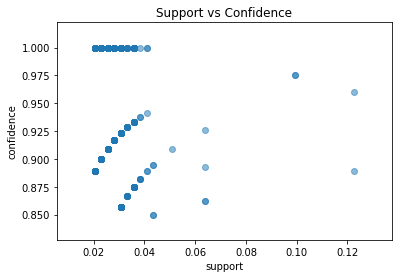

In [83]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

2. **Lift vs Confidence**

Text(0.5, 1.0, 'Lift vs Confidence')

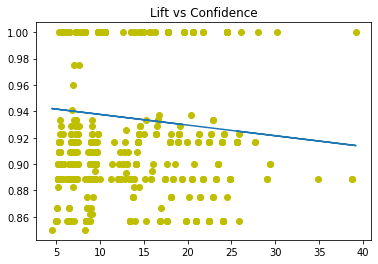

In [84]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
         fit_fn(rules['lift']))
plt.title('Lift vs Confidence')

3. **Support vs Lift**

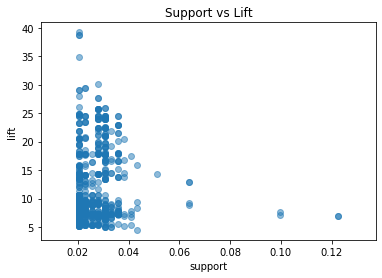

In [85]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()